### DATA PREPARATION

#### 1. Import libraries/packages and Dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Import necessary libraries/packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Filtering warnings and setting view options in pandas
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 100)
pd.options.display.max_rows = None

In [7]:
# Read the telecom data 

telecom = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/telecom_churn_data.csv")
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,...,NaN,NaN,154.0,50.0,NaN,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,...,0.0,NaN,NaN,NaN,46.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.0,0.00,0.00,0.00,117.96,241.33,208.16,98.61,0.00,...,NaN,56.0,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [8]:
# Checking the shape of the dataset
telecom.shape

(99999, 226)

#### 2. Data Understanding and Cleaning

In [9]:
# Checking the number of null values
telecom.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [10]:
#Checking the null values percentage
100*telecom.isnull().sum()/len(telecom)

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

There are columns which have more than 70% null values. Usually we would have dropped these columns but there are few columns here which might have useful information. We will analyse the null values in these column and then make a decision on whether to drop the column or we need to perform some operations on these column. 

In [11]:
# Checking if column has null values at same index. 
telecom['total_rech_data_6'].isnull().equals(telecom['date_of_last_rech_data_6'].isnull())

True

Here we can clearly see that both the columns have null values at same index. And we can safely conclude that no recharge was done for the month and missing values can be imputed with 0. 

In [12]:
# Filling the null values with 0 for the 2 columns
telecom['total_rech_data_6'].fillna(0, inplace=True)
telecom['av_rech_amt_data_6'].fillna(0, inplace=True)

We follow the same methodology and apply to __total_rech_data_7__, __date_of_last_rech_data_7__,__total_rech_data_8__ , __date_of_last_rech_data_8__ columns. 

In [13]:
# Checking if column has null values at same index. 
telecom['total_rech_data_7'].isnull().equals(telecom['date_of_last_rech_data_7'].isnull())

True

In [14]:
# Filling the null values with 0 for the 2 columns
telecom['total_rech_data_7'].fillna(0, inplace=True)
telecom['av_rech_amt_data_7'].fillna(0, inplace=True)

In [15]:
# Checking if column has null values at same index. 
telecom['total_rech_data_8'].isnull().equals(telecom['date_of_last_rech_data_8'].isnull())

True

In [16]:
# Filling the null values with 0 for the 2 columns
telecom['total_rech_data_8'].fillna(0, inplace=True)
telecom['av_rech_amt_data_8'].fillna(0, inplace=True)

We can create a new column combining columns 'total_rechdata' and 'av_rech_amtdata'.

In [17]:
# Creating a new column using 2 columns
telecom['total_data_rech_amt_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['total_data_rech_amt_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']
telecom['total_data_rech_amt_8'] = telecom['total_rech_data_8'] * telecom['av_rech_amt_data_8']
telecom['total_data_rech_amt_9'] = telecom['total_rech_data_9'] * telecom['av_rech_amt_data_9']

In [18]:
# Checking the null values percentage
100*telecom.isnull().sum()/len(telecom)

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [19]:
# Number of columns with more than 70% null values
sum(100*telecom.isnull().sum()/len(telecom)>=70)

35

We have 35 columns which have more than 70% columns. It has been given that after filtering high-valued customers we would be left with ~29000 rows. So, dropping might not be the best option here. 

Now let us take a look at the data dictionary and the column abbreviations to get a little deeper understanding of the column. 

In [20]:
# Checking the data dictionary for understanding the abbreviation
pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belongs to
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mobile to mobile)"
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


We will define what is high value customer. So, anyone who has recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first 2 months which are the good phase.

In [21]:
# Average recharge amount for the 70th percentile
np.percentile(telecom[['total_data_rech_amt_6','total_data_rech_amt_7','total_rech_amt_6','total_rech_amt_7']].mean(axis=1), 70)

239.0

So the 70th percentile of the average recharge amount in the first two month is __239__. Now we filter out the values we get. 

In [22]:
# Keeping the values which are greater than average recharge amount of 70th percentile
telecom = telecom[telecom[['total_data_rech_amt_6','total_data_rech_amt_7','total_rech_amt_6','total_rech_amt_7']].mean(axis=1) >= 239]
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,...,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,NaN
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,...,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,NaN
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.00,378.09,288.18,63.04,60.71,116.56,...,NaN,0.00,356.00,0.03,0.00,0.00,750.95,11.94,0.00,NaN,0.00,19.83,NaN,NaN,0.00,0.00,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,NaN
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,896.68,983.39,869.89,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4.48,6.16,23.34,29.98,91.81,87.93,104.81,107.54,0.75,0.00,1.58,0.00,0.0,0.0,0.00,0.00,97.04,94.09,129.74,137.53,97.93,...,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,193.897,366.966,811.480,48.96,50.66,33.58,15.74,85.41,89.36,205.89,111.88,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,48.96,50.66,33.58,15.74,82.94,83.01,148.56,83.73,0.00,0.00,0.00,2.45,0.0,0.0,17.71,4.08,131.91,133.68,182.14,101.93,0.00,...,252.0,0.00,0.48,0.01,13.93,0.00,599.09,1009.92,314.74,NaN,306.57,197.27,212.17,NaN,301.78,150.67,212.17,NaN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,NaN,1.0,1.0,1.0,604,40.45,51.86,0.00,0.00,0.0,712.0,540.0,252.0


In [23]:
# Checking the shape of the dataset after retrieving the high value customer
telecom.shape

(30001, 230)

In [24]:
# Resetting the index of the dataset
telecom = telecom.reset_index(drop=True)
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,...,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,NaN
1,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,...,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,NaN
2,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.00,378.09,288.18,63.04,60.71,116.56,...,NaN,0.00,356.00,0.03,0.00,0.00,750.95,11.94,0.00,NaN,0.00,19.83,NaN,NaN,0.00,0.00,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,NaN
3,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,896.68,983.39,869.89,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4.48,6.16,23.34,29.98,91.81,87.93,104.81,107.54,0.75,0.00,1.58,0.00,0.0,0.0,0.00,0.00,97.04,94.09,129.74,137.53,97.93,...,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN
4,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,193.897,366.966,811.480,48.96,50.66,33.58,15.74,85.41,89.36,205.89,111.88,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,48.96,50.66,33.58,15.74,82.94,83.01,148.56,83.73,0.00,0.00,0.00,2.45,0.0,0.0,17.71,4.08,131.91,133.68,182.14,101.93,0.00,...,252.0,0.00,0.48,0.01,13.93,0.00,599.09,1009.92,314.74,NaN,306.57,197.27,212.17,NaN,301.78,150.67,212.17,NaN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,NaN,1.0,1.0,1.0,604,40.45,51.86,0.00,0.00,0.0,712.0,540.0,252.0


Now, depending on the fourth month, tag the churned clients (churn=1, else 0) as follows: In the churn phase, those who have not made any calls (incoming or outgoing) AND have not utilised mobile internet even once. We will use the following columns: 

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [25]:
# Renaming the column
telecom.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8','sep_vbc_3g':'vbc_3g_9'}, inplace=True)

In [26]:
# Checking the column info for the last month
high_value_cust_9 = telecom[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']]
high_value_cust_9.head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00
2,34.91,142.18,0.00,0.00
3,252.61,1031.53,0.00,0.00
4,127.48,127.63,13.93,314.74


So, now any customer who hasn't utoilised any facility(calls or mobile data) during the 9th month, will have the row sum for the attributes equal to zero. This customer can be tagged as Churn (1) else the customer will be tagged as Not Churn (0).

In [27]:
# Creating a new column and labelling them as Churn(1) or Not Churn(0)
telecom['churn'] = telecom.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) & (x.total_og_mou_9 == 0) and (x.vol_2g_mb_9 == 0) and (x.vol_3g_mb_9 == 0)) else 0, axis=1)

In [28]:
# Looking at the column we created for churn
telecom['churn'].head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

In [29]:
# Checking the churn rate
100*telecom['churn'].sum()/len(telecom)

8.136395453484884

The churn percentage is __8.136%__. 

After tagging churners, we now remove all the attributes corresponding to the churn phase(attributes having ‘ \_9’, etc. in their names). 

In [30]:
# Dropping the columns for the 9th month
telecom.drop([col for col in telecom.columns if '_9' in col], axis=1, inplace = True)

In [31]:
# Checking the shape of the dataset now
telecom.shape

(30001, 175)

We have dropped ~50 columns now and the current shape of the dataset is:<br>
__Rows__: 30001<br>
**Columns**: 175

In [32]:
# Checking the null value percentage now
100*telecom.isnull().sum()/len(telecom)

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.746642
std_og_t2o_mou               0.746642
loc_ic_t2o_mou               0.746642
last_date_of_month_6         0.000000
last_date_of_month_7         0.089997
last_date_of_month_8         0.549982
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  1.816606
onnet_mou_7                  1.789940
onnet_mou_8                  3.913203
offnet_mou_6                 1.816606
offnet_mou_7                 1.789940
offnet_mou_8                 3.913203
roam_ic_mou_6                1.816606
roam_ic_mou_7                1.789940
roam_ic_mou_8                3.913203
roam_og_mou_6                1.816606
roam_og_mou_7                1.789940
roam_og_mou_8                3.913203
loc_og_t2t_mou_6             1.816606
loc_og_t2t_mou_7             1.789940
loc_og_t2t_mou_8             3.913203
loc_og_t2m_m

In [33]:
# Making a list of the column which has just one value present
col_to_drop = []
for col in telecom.columns:
    if len(telecom[col].unique()) <= 2:
        print(f"{col} - {telecom[col].unique()}")
        col_to_drop.append(col)

circle_id - [109]
loc_og_t2o_mou - [ 0. nan]
std_og_t2o_mou - [ 0. nan]
loc_ic_t2o_mou - [ 0. nan]
last_date_of_month_6 - ['6/30/2014']
last_date_of_month_7 - ['7/31/2014' nan]
last_date_of_month_8 - ['8/31/2014' nan]
std_og_t2c_mou_6 - [nan  0.]
std_og_t2c_mou_7 - [nan  0.]
std_og_t2c_mou_8 - [ 0. nan]
std_ic_t2o_mou_6 - [nan  0.]
std_ic_t2o_mou_7 - [nan  0.]
std_ic_t2o_mou_8 - [ 0. nan]
churn - [1 0]


Here we can see except "churn" column rest all have only one unique value. We can drop these columns as they will not add any useful information. 

In [34]:
# We drop churn column from the list as it is the target variable and we will be needing that column
col_to_drop.pop()

'churn'

In [35]:
# Checking the list of columns that we will be dropping
col_to_drop

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [36]:
# Dropping the column
telecom.drop(col_to_drop, axis=1, inplace = True)

In [37]:
# Checking the dataset
telecom.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,...,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,...,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,1
1,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,0.0,0.0,1
2,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,...,NaN,154.0,23.0,NaN,2.0,3.0,NaN,0.0,0.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,NaN,0.00,19.83,NaN,0.00,0.00,NaN,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,NaN,1.0,1.0,315,21.03,910.65,122.16,0.0,354.0,207.0,0
3,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,720,0.00,0.00,0.00,0.0,0.0,0.0,0
4,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.00,0.00,0.00,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0.0,17.71,0.0,...,NaN,179.0,179.0,NaN,0.0,0.0,NaN,2.0,2.0,0.0,356.0,270.0,0.00,0.48,0.01,0.00,599.09,1009.92,NaN,306.57,197.27,NaN,301.78,150.67,NaN,0.0,0.0,0,0,0,0,0,0,0,2,1,0,0,1,NaN,1.0,1.0,604,40.45,51.86,0.00,0.0,712.0,540.0,0


In [38]:
# Checking the number of columns which has more than 40% of null values
sum(100*telecom.isnull().sum()/len(telecom)>=40)

24

We will examine these 24 columns and try to figure out what can be done with these columns. We start with date column and we see that **'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'** are the three date columns.

Now, we can't put random values for date so it would be better to drop these columns.

In [39]:
# As stated, we can drop these column
telecom.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis=1, inplace = True)

Now, we move to **'max_rech_data_6', 'max_rech_data_7' & 'max_rech_data_8'** columns. We will analyse it and then take the necessary decision. 

In [40]:
# Analysing the max_rech_data for the 6th month 
telecom["max_rech_data_6"].describe()

count    16756.000000
mean       139.798580
std        118.851784
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_6, dtype: float64

In [41]:
# Number of null values in this column
telecom["max_rech_data_6"].isnull().sum()

13245

In [42]:
# Analysing the max_rech_data for the 7th month 
telecom["max_rech_data_7"].describe()

count    17057.000000
mean       140.431143
std        120.247247
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_7, dtype: float64

In [43]:
# Number of null values in this column
telecom["max_rech_data_7"].isnull().sum()

12944

In [44]:
# Analysing the max_rech_data for the 8th month 
telecom["max_rech_data_8"].describe()

count    15953.000000
mean       136.329217
std        119.531924
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_8, dtype: float64

In [45]:
# Number of null values in this column
telecom["max_rech_data_8"].isnull().sum()

14048

Analysing these columns we see that minimum recharge value has been 1 and max has been 1555. So, for null values we can impute the column with zeroes and conclude that no recharge mught have been done in these month and hence we had null values

In [46]:
# We can replace the null values with 0 for these columns
for col in ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']:
    telecom[col].fillna(0, inplace=True)

In [47]:
# Checking the null value percentage now
100*telecom.isnull().sum()/len(telecom)

mobile_number             0.000000
arpu_6                    0.000000
arpu_7                    0.000000
arpu_8                    0.000000
onnet_mou_6               1.816606
onnet_mou_7               1.789940
onnet_mou_8               3.913203
offnet_mou_6              1.816606
offnet_mou_7              1.789940
offnet_mou_8              3.913203
roam_ic_mou_6             1.816606
roam_ic_mou_7             1.789940
roam_ic_mou_8             3.913203
roam_og_mou_6             1.816606
roam_og_mou_7             1.789940
roam_og_mou_8             3.913203
loc_og_t2t_mou_6          1.816606
loc_og_t2t_mou_7          1.789940
loc_og_t2t_mou_8          3.913203
loc_og_t2m_mou_6          1.816606
loc_og_t2m_mou_7          1.789940
loc_og_t2m_mou_8          3.913203
loc_og_t2f_mou_6          1.816606
loc_og_t2f_mou_7          1.789940
loc_og_t2f_mou_8          3.913203
loc_og_t2c_mou_6          1.816606
loc_og_t2c_mou_7          1.789940
loc_og_t2c_mou_8          3.913203
loc_og_mou_6        

As a result, the issue statement makes it apparent that the individual incoming and outgoing properties are not employed for data analysis. Individual columns (whose totals are already accessible, such as incoming, outgoing, arpu, and so on) can be dropped to aid in analysis. Dropping these particular columns will also assist in the removal of multicollinearity.

In [48]:
# List of columns that we can drop
col_to_drop = ['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8','arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8','loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8','loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8','loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                ]

telecom.drop(col_to_drop, axis = 1, inplace = True)

In [49]:
# Checkign the shape of the dataset now
telecom.shape

(30001, 108)

In [50]:
# Checking the null value percentage now
100*telecom.isnull().sum()/len(telecom)

mobile_number             0.000000
arpu_6                    0.000000
arpu_7                    0.000000
arpu_8                    0.000000
onnet_mou_6               1.816606
onnet_mou_7               1.789940
onnet_mou_8               3.913203
offnet_mou_6              1.816606
offnet_mou_7              1.789940
offnet_mou_8              3.913203
roam_ic_mou_6             1.816606
roam_ic_mou_7             1.789940
roam_ic_mou_8             3.913203
roam_og_mou_6             1.816606
roam_og_mou_7             1.789940
roam_og_mou_8             3.913203
loc_og_mou_6              1.816606
loc_og_mou_7              1.789940
loc_og_mou_8              3.913203
std_og_mou_6              1.816606
std_og_mou_7              1.789940
std_og_mou_8              3.913203
isd_og_mou_6              1.816606
isd_og_mou_7              1.789940
isd_og_mou_8              3.913203
spl_og_mou_6              1.816606
spl_og_mou_7              1.789940
spl_og_mou_8              3.913203
og_others_6         

A missing value in a mobile internet usage observation would most likely indicate that the consumer is not using that service. This would also rule out any add-on services that would necessitate the purchase of a mobile internet package.
As a result of this reasoning, we can impute missing values for columns in mobile data using 0.

In [51]:
# List of columns where we can impute null values with 0
for col in ['count_rech_2g_6', 'count_rech_2g_7','count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7','count_rech_3g_8',
            'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']:
    telecom[col] = telecom[col].fillna(0)   

In [52]:
# The columns we can drop safely
telecom = telecom.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis=1)

In [53]:
# Checking the null value percentage
100*telecom.isnull().sum()/len(telecom)

mobile_number            0.000000
arpu_6                   0.000000
arpu_7                   0.000000
arpu_8                   0.000000
onnet_mou_6              1.816606
onnet_mou_7              1.789940
onnet_mou_8              3.913203
offnet_mou_6             1.816606
offnet_mou_7             1.789940
offnet_mou_8             3.913203
roam_ic_mou_6            1.816606
roam_ic_mou_7            1.789940
roam_ic_mou_8            3.913203
roam_og_mou_6            1.816606
roam_og_mou_7            1.789940
roam_og_mou_8            3.913203
loc_og_mou_6             1.816606
loc_og_mou_7             1.789940
loc_og_mou_8             3.913203
std_og_mou_6             1.816606
std_og_mou_7             1.789940
std_og_mou_8             3.913203
isd_og_mou_6             1.816606
isd_og_mou_7             1.789940
isd_og_mou_8             3.913203
spl_og_mou_6             1.816606
spl_og_mou_7             1.789940
spl_og_mou_8             3.913203
og_others_6              1.816606
og_others_7   

In [54]:
# List of all columns that still have null values
columns_with_null_values = telecom.columns[telecom.isna().any()].tolist()
print(columns_with_null_values)

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8']


In [55]:
# Checking the info of all these column to get little information on each column
telecom[columns_with_null_values].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   onnet_mou_6    29456 non-null  float64
 1   onnet_mou_7    29464 non-null  float64
 2   onnet_mou_8    28827 non-null  float64
 3   offnet_mou_6   29456 non-null  float64
 4   offnet_mou_7   29464 non-null  float64
 5   offnet_mou_8   28827 non-null  float64
 6   roam_ic_mou_6  29456 non-null  float64
 7   roam_ic_mou_7  29464 non-null  float64
 8   roam_ic_mou_8  28827 non-null  float64
 9   roam_og_mou_6  29456 non-null  float64
 10  roam_og_mou_7  29464 non-null  float64
 11  roam_og_mou_8  28827 non-null  float64
 12  loc_og_mou_6   29456 non-null  float64
 13  loc_og_mou_7   29464 non-null  float64
 14  loc_og_mou_8   28827 non-null  float64
 15  std_og_mou_6   29456 non-null  float64
 16  std_og_mou_7   29464 non-null  float64
 17  std_og_mou_8   28827 non-null  float64
 18  isd_og

In [56]:
# Imputing all the these column with 0
for col in columns_with_null_values:
    telecom[col] = telecom[col].fillna(0)

In [57]:
# Checking if dataset still has null values or not
100*telecom.isnull().sum()/len(telecom)

mobile_number            0.0
arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
onnet_mou_6              0.0
onnet_mou_7              0.0
onnet_mou_8              0.0
offnet_mou_6             0.0
offnet_mou_7             0.0
offnet_mou_8             0.0
roam_ic_mou_6            0.0
roam_ic_mou_7            0.0
roam_ic_mou_8            0.0
roam_og_mou_6            0.0
roam_og_mou_7            0.0
roam_og_mou_8            0.0
loc_og_mou_6             0.0
loc_og_mou_7             0.0
loc_og_mou_8             0.0
std_og_mou_6             0.0
std_og_mou_7             0.0
std_og_mou_8             0.0
isd_og_mou_6             0.0
isd_og_mou_7             0.0
isd_og_mou_8             0.0
spl_og_mou_6             0.0
spl_og_mou_7             0.0
spl_og_mou_8             0.0
og_others_6              0.0
og_others_7              0.0
og_others_8              0.0
total_og_mou_6           0.0
total_og_mou_7           0.0
total_og_mou_8           0.0
loc_ic_mou_6  

Now, let's analyze the arpu(Average Revenue Per User) column for once. Something seems suspicious!!

In [58]:
# Checking the column arpu for the 6th month
telecom["arpu_6"].describe()

count    30001.000000
mean       558.490824
std        460.640461
min      -2258.709000
25%        309.865000
50%        481.694000
75%        699.943000
max      27731.088000
Name: arpu_6, dtype: float64

In [59]:
# Checking the column arpu for the 7th month
telecom["arpu_7"].describe()

count    30001.000000
mean       560.782203
std        479.776947
min      -2014.045000
25%        309.826000
50%        480.943000
75%        698.315000
max      35145.834000
Name: arpu_7, dtype: float64

In [60]:
# Checking the column arpu for the 8th month
telecom["arpu_8"].describe()

count    30001.000000
mean       508.597957
std        501.961981
min       -945.808000
25%        231.473000
50%        427.585000
75%        661.491000
max      33543.624000
Name: arpu_8, dtype: float64

Now the revenue generated from a user cannot be a negative number. apru should be zero when the customer is not using any service. Now if arpu is negative for any row, then that would mean that is a wrong/corrupt data. It would be better to drop such rows to avoid discrepancy. 

In [61]:
# Keeping only that column where there is no negative values in arpu
telecom= telecom[(telecom['arpu_6'] >= 0) & (telecom['arpu_7'] >= 0) & (telecom['arpu_8'] >= 0)]

In [62]:
# Checking the dataset now
telecom.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,...,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,...,362,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,1
1,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,422.16,533.91,255.79,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,427.88,355.23,188.04,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,...,1580,790,3638,1580,790,1580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.0,0.0,0.0,1
2,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,378.09,288.18,63.04,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,81.43,23.83,15.79,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,...,437,601,120,90,154,30,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.00,356.00,0.03,0.00,750.95,11.94,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,0.0,1.0,1.0,315,21.03,910.65,122.16,0.0,354.0,207.0,0
3,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,97.04,94.09,129.74,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,125.33,87.68,159.11,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,...,600,680,718,50,50,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,720,0.00,0.00,0.00,0.0,0.0,0.0,0
4,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,131.91,133.68,182.14,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0.0,17.71,0.0,0.0,0.0,134.38,140.04,239.48,116.63,174.41,224.21,2.94,14.89,57.29,119.58,222.89,298.33,0.00,0.0,0.0,0.00,28.23,3.74,0.00,...,0,454,439,0,179,179,0.0,2.0,2.0,0.0,179.0,179.0,0.0,0.0,0.0,0.0,2.0,2.0,0.00,0.48,0.01,0.00,599.09,1009.92,0.0,0.0,0.0,0,0,0,0,0,0,0,2,1,0,0,1,0.0,1.0,1.0,604,40.45,51.86,0.00,0.0,712.0,540.0,0


In [63]:
# Checking the shape of the dataset
telecom.shape

(29824, 105)

In [64]:
# Checking if there is null values present again
telecom.isnull().sum()

mobile_number            0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_mou_6             0
std_og_mou_7             0
std_og_mou_8             0
isd_og_mou_6             0
isd_og_mou_7             0
isd_og_mou_8             0
spl_og_mou_6             0
spl_og_mou_7             0
spl_og_mou_8             0
og_others_6              0
og_others_7              0
og_others_8              0
total_og_mou_6           0
total_og_mou_7           0
total_og_mou_8           0
loc_ic_mou_6             0
loc_ic_mou_7             0
loc_ic_mou_8             0
s

### EXPLORATORY DATA ANALYSIS

In [65]:
# Getting the statistic information from all the columns
telecom.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,...,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
count,2.982400e+04,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,...,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.00000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000
mean,7.001205e+09,559.219456,562.562717,510.085640,261.221418,268.432668,234.713851,373.290400,378.524141,335.496097,16.163287,12.665772,12.540844,26.587856,20.221840,19.959368,254.184985,255.602001,236.198045,347.042871,364.456108,307.816943,2.157038,2.105380,1.955376,5.820176,7.118840,6.572885,0.661218,0.043034,0.057949,609.875318,629.333328,552.608763,231.763090,235.266615,224.307171,46.913021,49.226000,44.591636,290.629534,297.906546,281.173369,0.061103,0.019789,0.026632,10.731791,11.881996,11.018455,1.152407,...,660.539767,661.379493,586.365343,168.492724,171.420433,160.375402,1.667382,1.85847,1.628856,78.109643,79.998894,72.777763,1.240109,1.400818,1.213653,0.427273,0.457652,0.415203,126.702837,125.500523,106.360809,344.676775,371.089760,352.732650,0.013546,0.012574,0.011400,0.174859,0.183912,0.154272,1.065249,1.216906,1.059382,0.217778,0.229513,0.211876,0.209496,0.228138,0.203326,0.517939,0.525181,0.478977,1211.066658,169.511731,179.168692,158.833359,455.662311,529.663834,465.245861,0.079265
std,6.908536e+05,459.504626,478.650800,501.034006,459.882386,480.118084,458.523657,479.935683,497.879922,479.852372,76.476134,75.919274,74.296839,115.896578,96.329109,105.000152,377.768435,374.931788,362.335779,607.363864,639.590635,607.789460,45.933468,45.671468,44.840402,17.582614,21.812118,20.334324,4.117322,2.684681,3.3249

In [66]:
#  Getting the column info for the below columns
telecom[['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29824 entries, 0 to 30000
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  29824 non-null  float64
 1   night_pck_user_7  29824 non-null  float64
 2   night_pck_user_8  29824 non-null  float64
 3   fb_user_6         29824 non-null  float64
 4   fb_user_7         29824 non-null  float64
 5   fb_user_8         29824 non-null  float64
dtypes: float64(6)
memory usage: 1.6 MB


Since these 6 variables are binary values, i.e, 0 and 1. We can change the type to int64.

In [67]:
# Changing the datatype to int from float as these are 0 and 1 values
telecom[['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']] = telecom[['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']].astype('int64')

In [68]:
# Checking whether the change has been done
telecom[['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29824 entries, 0 to 30000
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   night_pck_user_6  29824 non-null  int64
 1   night_pck_user_7  29824 non-null  int64
 2   night_pck_user_8  29824 non-null  int64
 3   fb_user_6         29824 non-null  int64
 4   fb_user_7         29824 non-null  int64
 5   fb_user_8         29824 non-null  int64
dtypes: int64(6)
memory usage: 1.6 MB


In [69]:
# Checking the shape of the dataset now
telecom.shape

(29824, 105)

In [70]:
# Checking if there are duplicates in the dataset or not
len(telecom["mobile_number"]) == len(telecom)

True

Hence, we can conclude that there are no duplicate rows in the dataset.

In [71]:
# We can drop the mobile_number column as it does not help us further
telecom.drop(['mobile_number'], axis=1, inplace = True)

In [72]:
# Checking the dataset now
telecom.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,...,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,...,362,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,968,30.40,0.00,101.20,252.0,252.0,252.0,1
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,422.16,533.91,255.79,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,427.88,355.23,188.04,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,...,1580,790,3638,1580,790,1580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,1
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,378.09,288.18,63.04,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,81.43,23.83,15.79,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,...,437,601,120,90,154,30,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.00,356.00,0.03,0.00,750.95,11.94,0,0,0,0,1,0,0,1,3,0,0,0,0,0,0,0,1,1,315,21.03,910.65,122.16,0.0,354.0,207.0,0
3,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,97.04,94.09,129.74,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,125.33,87.68,159.11,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,...,600,680,718,50,50,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.0,0.0,0.0,0
4,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,131.91,133.68,182.14,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0.0,17.71,0.0,0.0,0.0,134.38,140.04,239.48,116.63,174.41,224.21,2.94,14.89,57.29,119.58,222.89,298.33,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,...,0,454,439,0,179,179,0.0,2.0,2.0,0.0,179.0,179.0,0.0,0.0,0.0,0.0,2.0,2.0,0.00,0.48,0.01,0.00,599.09,1009.92,0,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,1,1,604,40.45,51.86,0.00,0.0,712.0,540.0,0


#### 1. Univariate Analysis

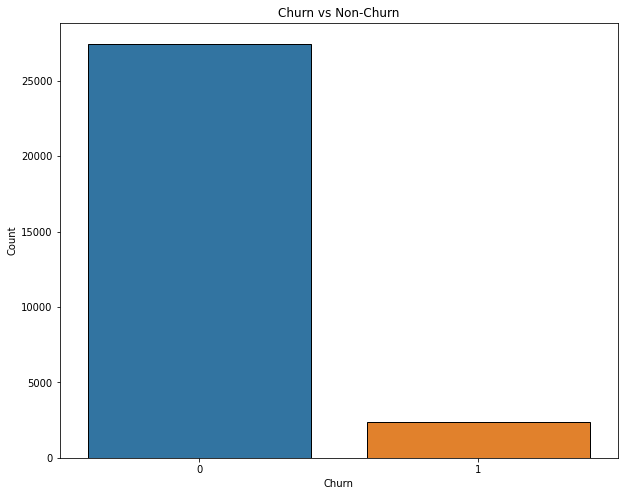

In [73]:
# Bar chart for the frequency of both Users
plt.figure(figsize=(10,8))
plt.title("Churn vs Non-Churn")
ax = sns.barplot(x="churn", y=telecom.index, data=telecom, estimator=len, edgecolor="black")
plt.xlabel("Churn")
plt.ylabel("Count")
#ax.bar_label(ax.containers[0])
plt.show()

**INSIGHTS**<br>
1. **CHURN** - 2364
2. **NON-CHURN** - 27460

**CHURN PERCENTAGE** - 8.61%

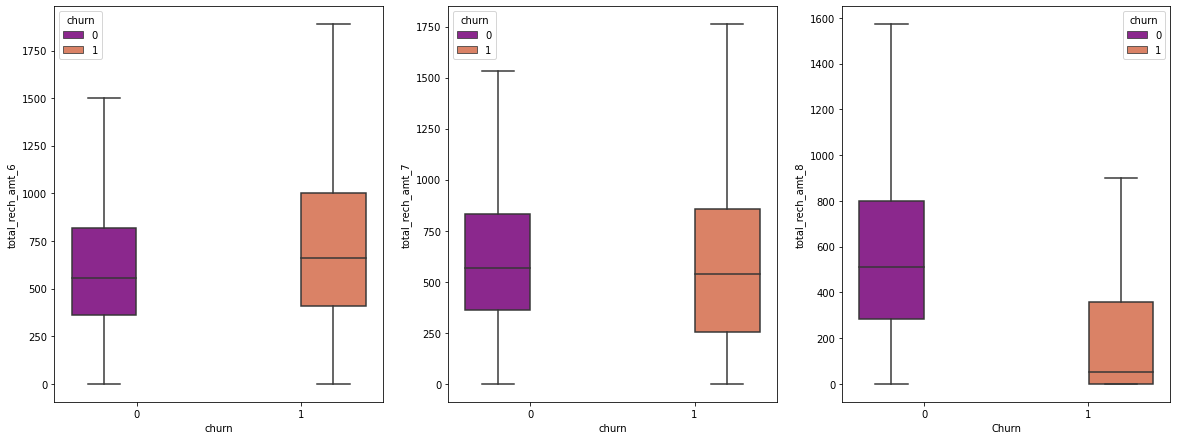

In [74]:
# The boxplot for 3 months for the below column
plt.figure(figsize=(20,16))
plt.title("Box Plot of Max Recharge Amount")
plt.subplot(2,3,1)
sns.boxplot(data=telecom, y="total_rech_amt_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,2)
sns.boxplot(data=telecom, y="total_rech_amt_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,3)
sns.boxplot(data=telecom, y="total_rech_amt_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.xlabel("Churn")
plt.show()

**INSIGHTS**

We can see a drop in the total recharge amount for churned customers in the 8th Month which is the Action Phase.

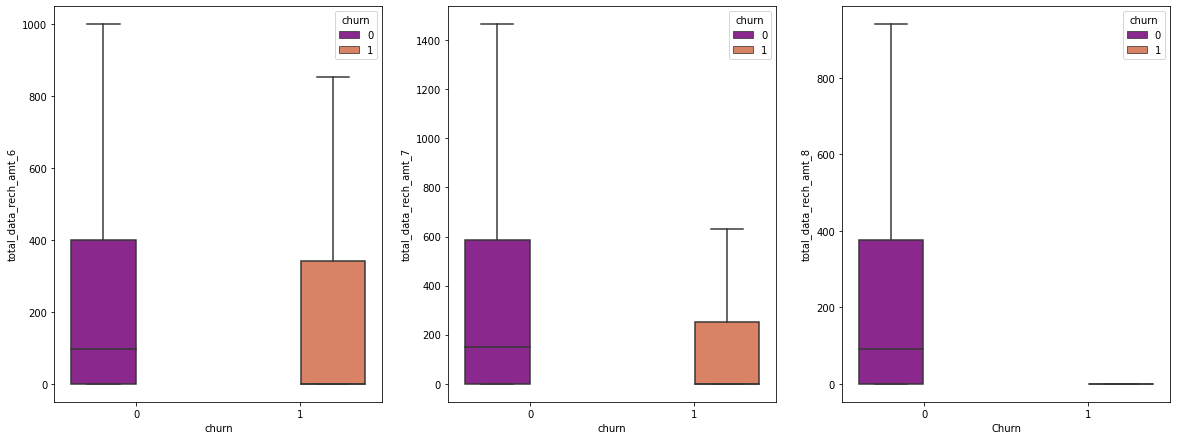

In [75]:
# The boxplot for 3 months for the below column
plt.figure(figsize=(20,16))
plt.title("Box Plot of Total Recharge Amount")
plt.subplot(2,3,1)
sns.boxplot(data=telecom, y="total_data_rech_amt_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,2)
sns.boxplot(data=telecom, y="total_data_rech_amt_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,3)
sns.boxplot(data=telecom, y="total_data_rech_amt_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.xlabel("Churn")
plt.show()

**INSIGHTS**

We can see that there is a huge drop in total recharge amount for data in the 8th month which is the action phase for churned customers.

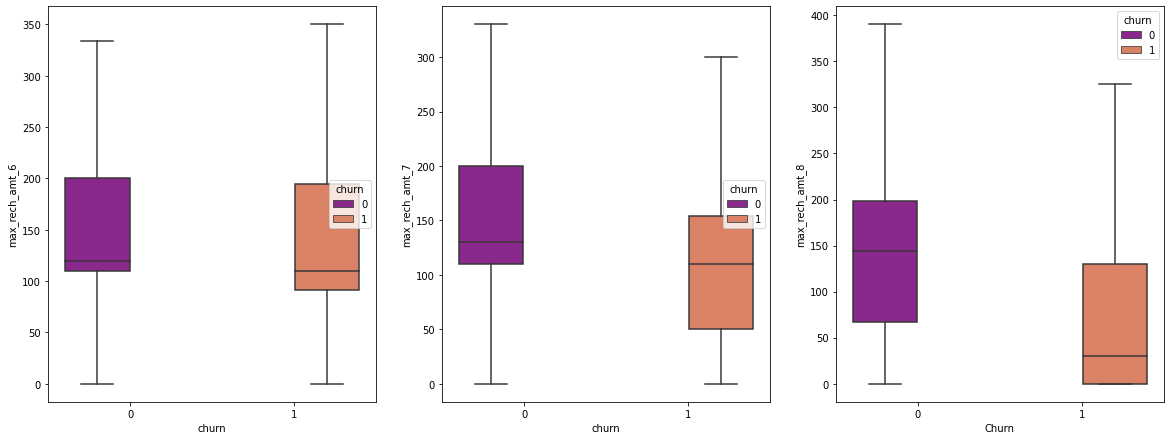

In [76]:
# The boxplot for 3 months for the below column
plt.figure(figsize=(20,16))
plt.title("Box Plot of Max Recharge Amount")
plt.subplot(2,3,1)
sns.boxplot(data=telecom, y="max_rech_amt_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,2)
sns.boxplot(data=telecom, y="max_rech_amt_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,3)
sns.boxplot(data=telecom, y="max_rech_amt_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.xlabel("Churn")
plt.show()

**INSIGHTS** 

 We can see that there is a huge drop in maximum recharge amount for data in the 8th month which is the action phase for churned customers.

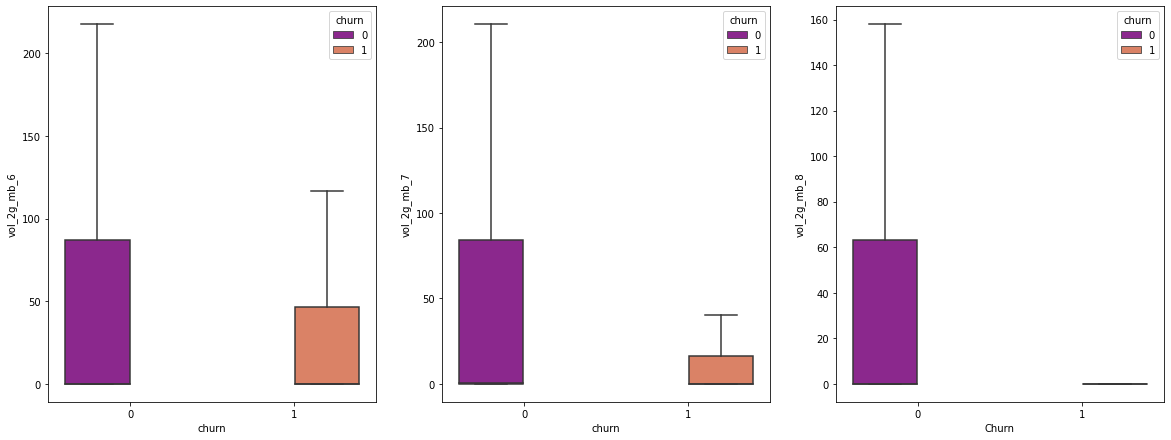

In [77]:
# The boxplot for 3 months for the below column
plt.figure(figsize=(20,16))
plt.title("Box Plot of Volume of 2G Usage")
plt.subplot(2,3,1)
sns.boxplot(data=telecom, y="vol_2g_mb_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,2)
sns.boxplot(data=telecom, y="vol_2g_mb_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,3)
sns.boxplot(data=telecom, y="vol_2g_mb_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.xlabel("Churn")
plt.show()

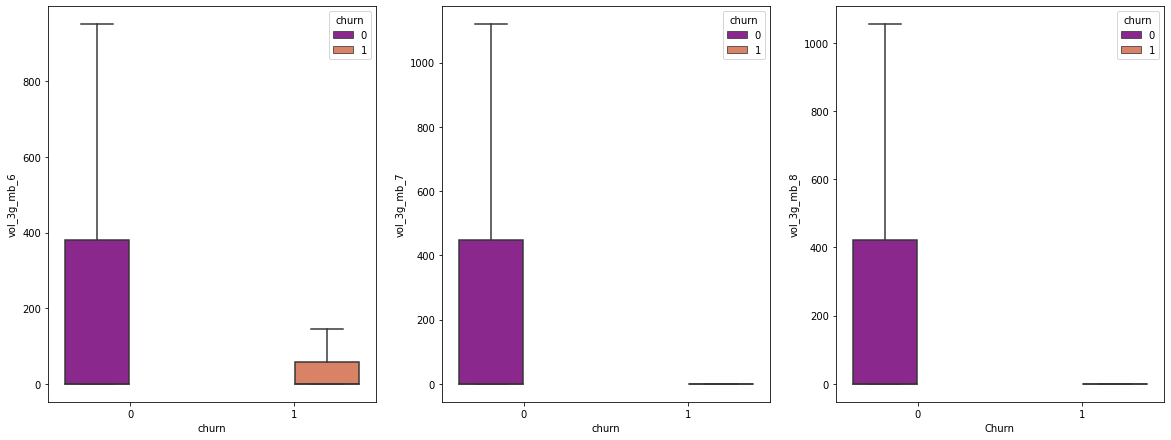

In [78]:
# The boxplot for 3 months for the below column
plt.figure(figsize=(20,16))
plt.title("Box Plot of Volume of 3G Usage")
plt.subplot(2,3,1)
sns.boxplot(data=telecom, y="vol_3g_mb_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,2)
sns.boxplot(data=telecom, y="vol_3g_mb_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,3)
sns.boxplot(data=telecom, y="vol_3g_mb_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.xlabel("Churn")
plt.show()

**INSIGHTS**

1.  In the eighth month, churned customers' usage of 2G and 3G declines.
2.  We also notice that non-churned consumers use 2G/3G more frequently, implying that churned customers may be from places where 2G/3G service is not readily available.

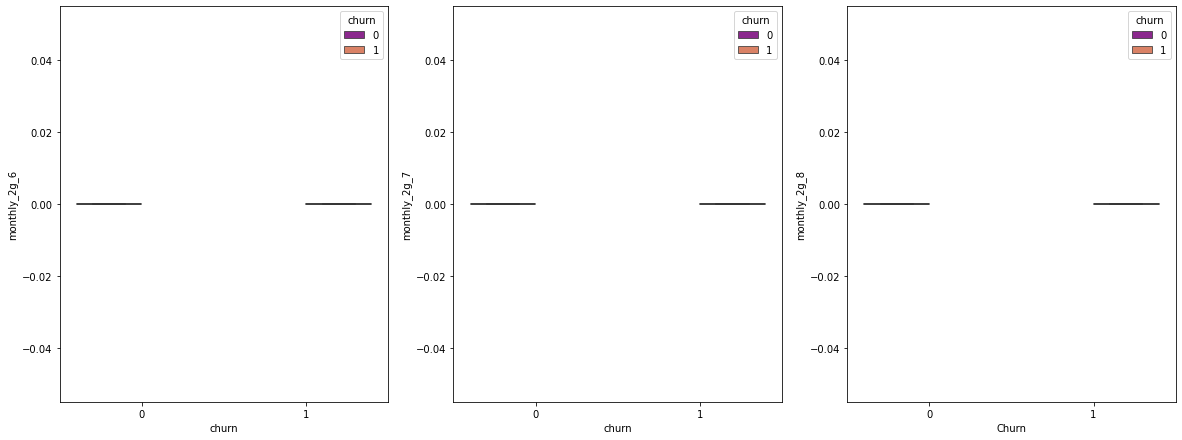

In [79]:
# The boxplot for 3 months for the below column
plt.figure(figsize=(20,16))
plt.title("Box Plot of Volume of Monthly 2G subscription")
plt.subplot(2,3,1)
sns.boxplot(data=telecom, y="monthly_2g_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,2)
sns.boxplot(data=telecom, y="monthly_2g_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,3)
sns.boxplot(data=telecom, y="monthly_2g_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.xlabel("Churn")
plt.show()

Here, the value range is very low and hence box plot is not able to give us proper insights about the column. We will try changing the plot. 

In [80]:
# Creating a list of the columns which depicts monthly subsription
monthly_subcription_cols = telecom.columns[telecom.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_subcription_cols.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

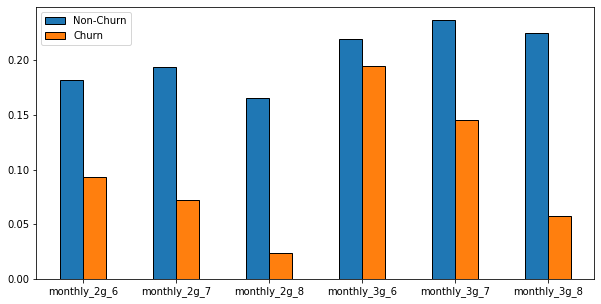

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non-Churn,0.181865,0.193518,0.165513,0.219774,0.236744,0.225127
Churn,0.093486,0.072335,0.023689,0.194585,0.145516,0.057953


In [81]:
# Plotting the bargraph and comparing for both churn and non-churn
non_churn = telecom[telecom["churn"]==0].filter(monthly_subcription_cols)
churn = telecom[telecom["churn"]==1].filter(monthly_subcription_cols)

mean_nc = pd.DataFrame([non_churn.mean()], index={"Non-Churn"})
mean_c = pd.DataFrame([churn.mean()], index={"Churn"})

merged_mean = pd.concat([mean_nc, mean_c])

merged_mean.T.plot.bar(figsize=(10,5),rot=0, edgecolor="black")
plt.show()

merged_mean

**INSIGHTS**

We can see a drop in monthly subscription for churned customers in 8th Month yet again.

In [82]:
# Creating a list of columns which depicts volume based columns
volume_based_cols = telecom.columns[telecom.columns.str.contains('vbc_3g',regex=True)]
volume_based_cols.tolist()

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

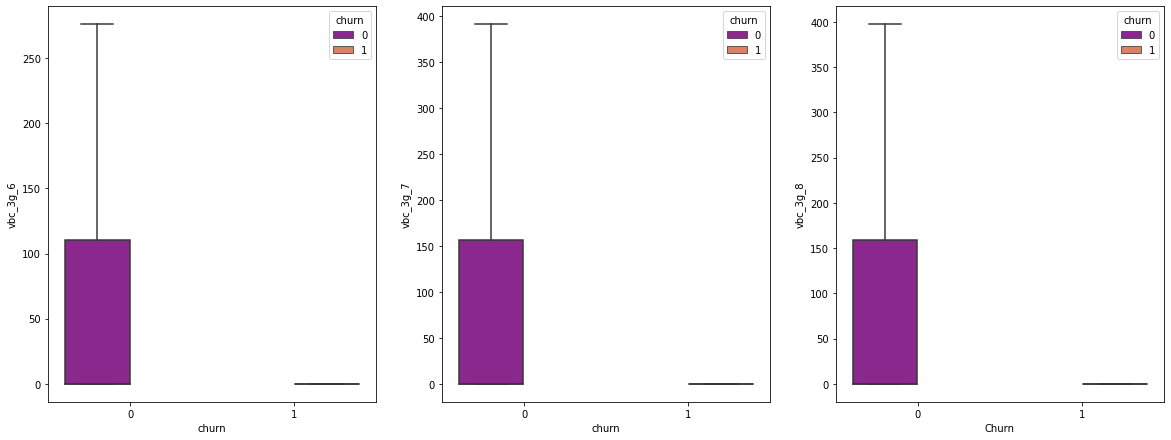

In [83]:
# The boxplot for 3 months for the below column
plt.figure(figsize=(20,16))
plt.title("Box Plot of Volume Based Cost")
plt.subplot(2,3,1)
sns.boxplot(data=telecom, y="vbc_3g_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,2)
sns.boxplot(data=telecom, y="vbc_3g_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,3)
sns.boxplot(data=telecom, y="vbc_3g_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.xlabel("Churn")
plt.show()

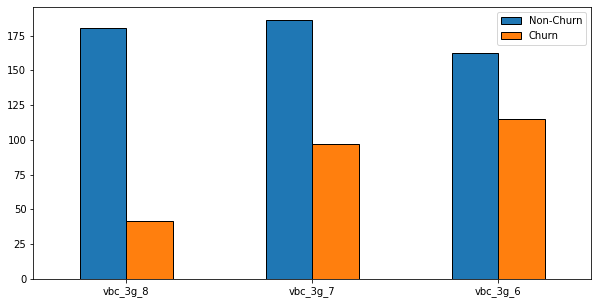

,vbc_3g_8,vbc_3g_7,vbc_3g_6
Non-Churn,180.496883,186.209092,162.603763
Churn,41.909251,97.388075,115.036705


In [84]:
# Plotting the bargraph and comparing for both churn and non-churn
non_churn = telecom[telecom["churn"]==0].filter(volume_based_cols)
churn = telecom[telecom["churn"]==1].filter(volume_based_cols)

mean_nc = pd.DataFrame([non_churn.mean()], index={"Non-Churn"})
mean_c = pd.DataFrame([churn.mean()], index={"Churn"})

merged_mean = pd.concat([mean_nc, mean_c])

merged_mean.T.plot.bar(figsize=(10,5),rot=0, edgecolor="black")
plt.show()

merged_mean

**INSIGHTS**

Significantly, it shows that Churned customers have lower volume-based costs for 3G than Non-Churned customers, and that vbc has dropped in the eighth month.

In [85]:
# Creating the list of columns which has sachet packages
sachet_based_cols = telecom.columns[telecom.columns.str.contains('sachet_2g|sachet_3g',regex=True)]
sachet_based_cols.tolist()

['sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8']

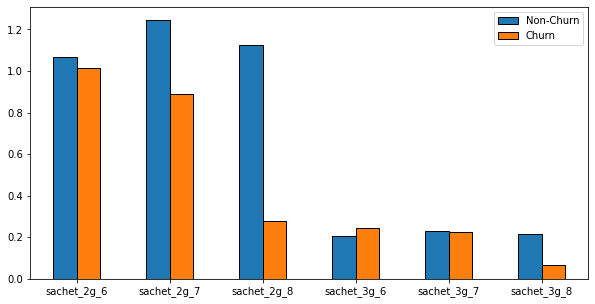

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
Non-Churn,1.069811,1.245229,1.126693,0.206482,0.228514,0.215040
Churn,1.012267,0.887902,0.277496,0.244501,0.223773,0.067259


In [86]:
# Plotting the bargraph and comparing for both churn and non-churn
non_churn = telecom[telecom["churn"]==0].filter(sachet_based_cols)
churn = telecom[telecom["churn"]==1].filter(sachet_based_cols)

mean_nc = pd.DataFrame([non_churn.mean()], index={"Non-Churn"})
mean_c = pd.DataFrame([churn.mean()], index={"Churn"})

merged_mean = pd.concat([mean_nc, mean_c])

merged_mean.T.plot.bar(figsize=(10,5),rot=0, edgecolor="black")
plt.show()

merged_mean

**INSIGHTS**

We can see the drop in sachet services in 8th month for churned customers even here.

In [87]:
# Creating a list of columns which depicts arpu
arpu_based_cols = telecom.columns[telecom.columns.str.contains('arpu_',regex=True)]
arpu_based_cols.tolist()

['arpu_6', 'arpu_7', 'arpu_8']

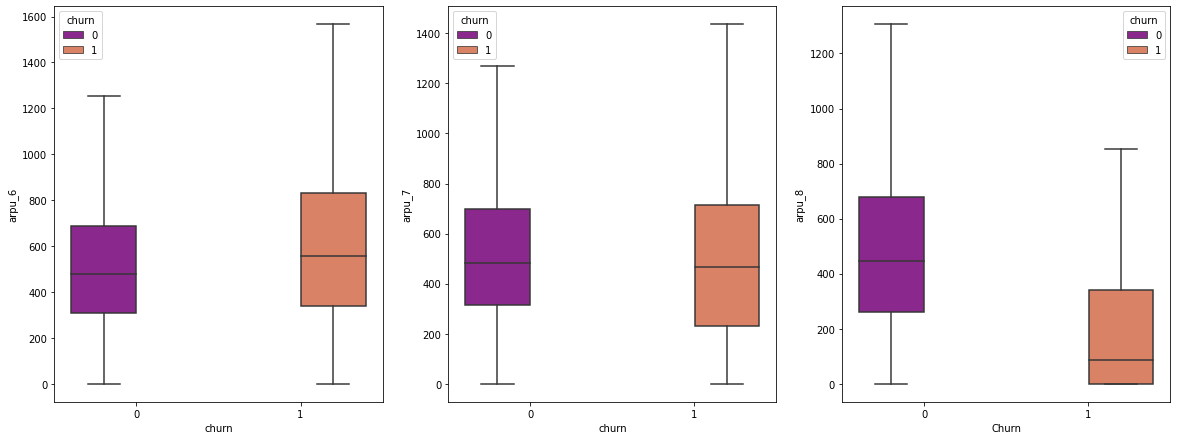

In [88]:
# The boxplot for 3 months for the below column
plt.figure(figsize=(20,16))
plt.title("Box Plot of Average Revenue Per User")
plt.subplot(2,3,1)
sns.boxplot(data=telecom, y="arpu_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,2)
sns.boxplot(data=telecom, y="arpu_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,3)
sns.boxplot(data=telecom, y="arpu_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.xlabel("Churn")
plt.show()

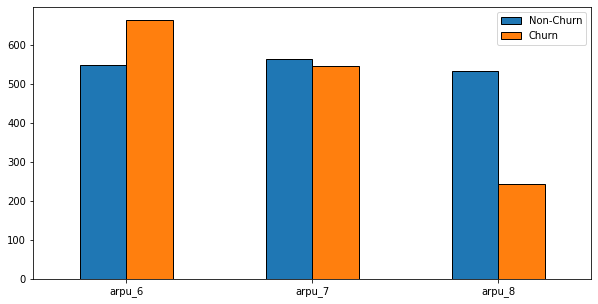

,arpu_6,arpu_7,arpu_8
Non-Churn,550.159676,563.851418,533.072825
Churn,664.457006,547.593288,243.068673


In [89]:
# Plotting the bargraph and comparing for both churn and non-churn
non_churn = telecom[telecom["churn"]==0].filter(arpu_based_cols)
churn = telecom[telecom["churn"]==1].filter(arpu_based_cols)

mean_nc = pd.DataFrame([non_churn.mean()], index={"Non-Churn"})
mean_c = pd.DataFrame([churn.mean()], index={"Churn"})

merged_mean = pd.concat([mean_nc, mean_c])

merged_mean.T.plot.bar(figsize=(10,5),rot=0, edgecolor="black")
plt.show()

merged_mean

**INSIGHTS**

We can see the drop in average revenue per user in 8th month for churned customers even here.

In [90]:
# Checking the column for offnet
offnet_based_cols = telecom.columns[telecom.columns.str.contains('offnet.*mou',regex=True)]
offnet_based_cols.tolist()

['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']

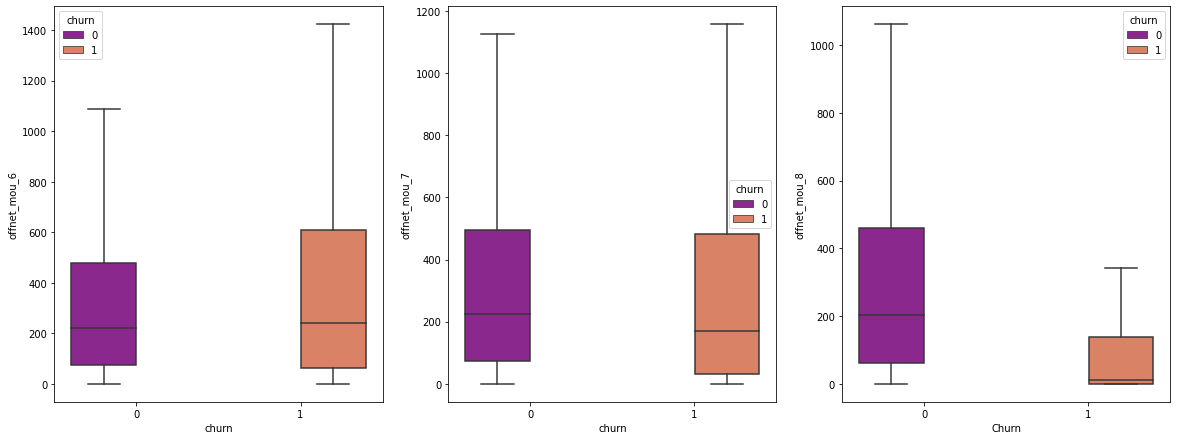

In [91]:
# The boxplot for 3 months for the below column
plt.figure(figsize=(20,16))
plt.title("Box Plot of Offnet Usage")
plt.subplot(2,3,1)
sns.boxplot(data=telecom, y="offnet_mou_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,2)
sns.boxplot(data=telecom, y="offnet_mou_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,3)
sns.boxplot(data=telecom, y="offnet_mou_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.xlabel("Churn")
plt.show()

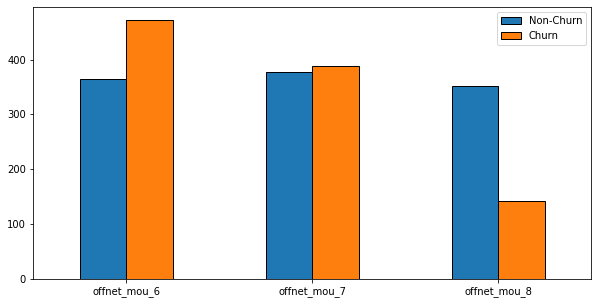

,offnet_mou_6,offnet_mou_7,offnet_mou_8
Non-Churn,364.789331,377.711573,352.168725
Churn,472.038003,387.962851,141.828431


In [92]:
# Plotting the bargraph and comparing for both churn and non-churn
non_churn = telecom[telecom["churn"]==0].filter(offnet_based_cols)
churn = telecom[telecom["churn"]==1].filter(offnet_based_cols)

mean_nc = pd.DataFrame([non_churn.mean()], index={"Non-Churn"})
mean_c = pd.DataFrame([churn.mean()], index={"Churn"})

merged_mean = pd.concat([mean_nc, mean_c])

merged_mean.T.plot.bar(figsize=(10,5),rot=0, edgecolor="black")
plt.show()

merged_mean

**INSIGHTS**

We can see the drop for offnet mou services in the 8th month in these columns as well. 

In [93]:
# Checking the onnet columns and analysing them
onnet_based_cols = telecom.columns[telecom.columns.str.contains('^onnet.*mou',regex=True)]
onnet_based_cols.tolist()

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']

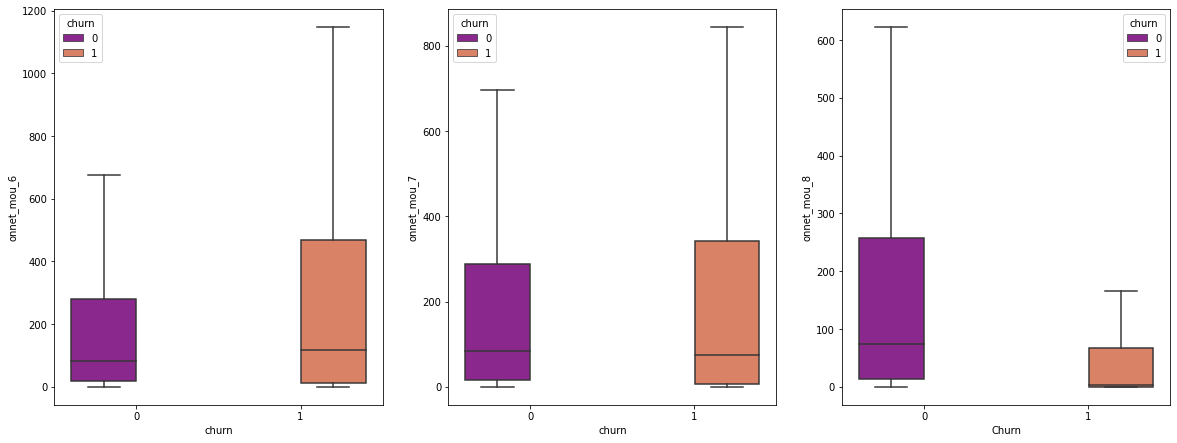

In [94]:
plt.figure(figsize=(20,16))
plt.title("Box Plot of Onnet Usage")
plt.subplot(2,3,1)
sns.boxplot(data=telecom, y="onnet_mou_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,2)
sns.boxplot(data=telecom, y="onnet_mou_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,3)
sns.boxplot(data=telecom, y="onnet_mou_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
plt.xlabel("Churn")
plt.show()

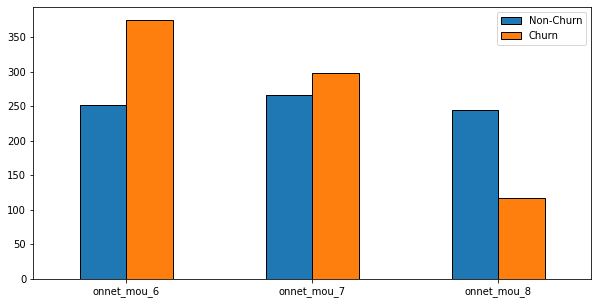

,onnet_mou_6,onnet_mou_7,onnet_mou_8
Non-Churn,251.434094,265.852143,244.895218
Churn,374.910051,298.407805,116.448058


In [95]:
# Plotting the bargraph and comparing for both churn and non-churn
non_churn = telecom[telecom["churn"]==0].filter(onnet_based_cols)
churn = telecom[telecom["churn"]==1].filter(onnet_based_cols)

mean_nc = pd.DataFrame([non_churn.mean()], index={"Non-Churn"})
mean_c = pd.DataFrame([churn.mean()], index={"Churn"})

merged_mean = pd.concat([mean_nc, mean_c])

merged_mean.T.plot.bar(figsize=(10,5),rot=0, edgecolor="black")
plt.show()

merged_mean

**INSIGHTS**

We also see here a drop in Onnet usage in the 8th month for churned customers yet again

In [96]:
# Making a copy of dataset and naming as tenure as we will analysing it
tenure = telecom.copy()

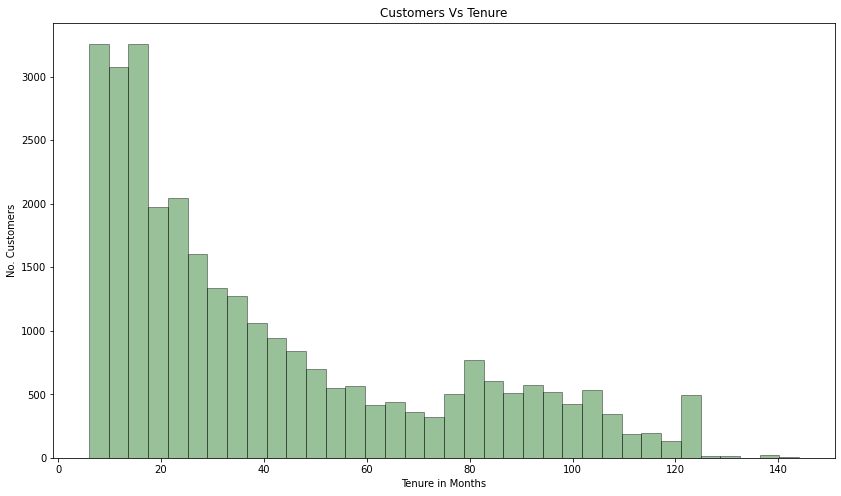

In [97]:
# Plotting a histogram to get tenure for number of customers
plt.figure(figsize=(14,8))
# aon --> Age on network - number of days the customer is using the operator T network
tenure['tenure'] = tenure['aon']/30
tenure['tenure'].head()
ax = sns.distplot(tenure['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkgreen', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('No. Customers')
ax.set_xlabel('Tenure in Months')
ax.set_title('Customers Vs Tenure')
plt.show()

In [98]:
# Making a bin for the number of years as this will give us more insight and clear picture
bins = [0, 6, 12, 24, 60, 61]
bin_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure['tenure_range'] = pd.cut(tenure['tenure'], bins, labels=bin_label)
tenure['tenure_range'].head()

0        2-5 Yrs
1        2-5 Yrs
2    6-12 Months
3        1-2 Yrs
4        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

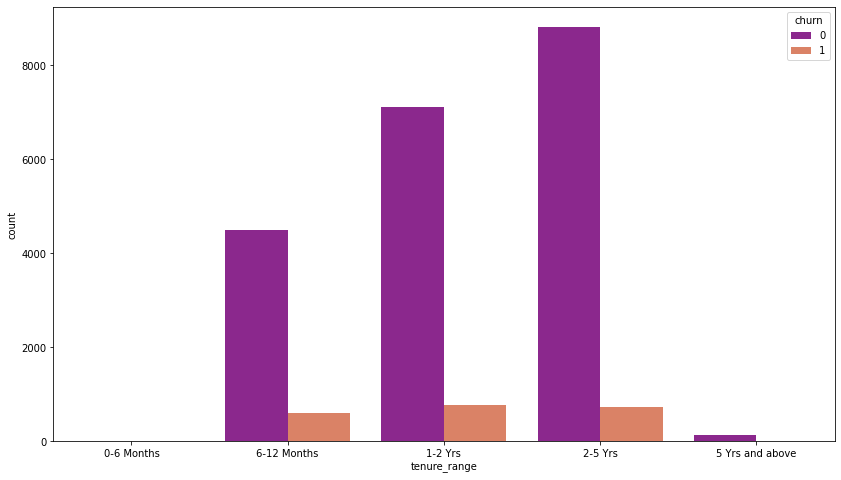

In [99]:
# plotting the bar graph after binning is done
plt.figure(figsize=(14,8))
sns.countplot(x = 'tenure_range', hue = 'churn',data = tenure,palette=("plasma"))
plt.show()

### 2. BIVARIATE ANALYSIS

In [100]:
# Retrieving list of all columns with mou usage for the 6th month
mou_og_cols = telecom.columns[telecom.columns.str.contains('.*_og_.*mou_6',regex=True)]
mou_og_cols

Index(['roam_og_mou_6', 'loc_og_mou_6', 'std_og_mou_6', 'isd_og_mou_6',
       'spl_og_mou_6', 'total_og_mou_6'],
      dtype='object')

In [101]:
# Storing the values of these columns in the dataset for heatmap
df_mou_og_cols = telecom.filter(mou_og_cols)
df_mou_og_cols

Output hidden; open in https://colab.research.google.com to view.

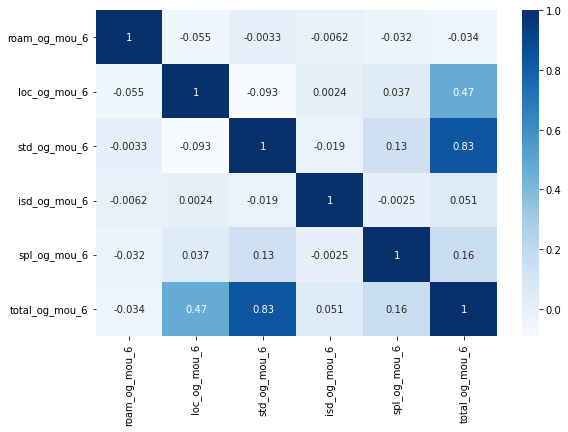

In [102]:
# Heatmap for the columns 
plt.figure(figsize=(9,6))
sns.heatmap(df_mou_og_cols.corr(),cmap="Blues",annot=True)
plt.show()

**INSIGHTS**

We can see that total_og_mou_6, std_og_mou_6 and loc_og_mou_6 are collinear.So we can remove these columns for all months from the data set. 

In [103]:
# Checking the shape of the dataset
telecom.shape

(29824, 104)

In [104]:
# Combining all the columns in the Good Phase that is 6th and 7th month and creating a new column
cols = telecom.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(cols.unique()):
    print(col)
    avg_col_name = "avg_"+ col+"_av67"
    col_of_6 = col+"_6"
    col_of_7 = col+"_7"
    telecom[avg_col_name] = (telecom[col_of_6]  + telecom[col_of_7])/ 2

arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_mou
std_og_mou
isd_og_mou
spl_og_mou
og_others
total_og_mou
loc_ic_mou
std_ic_mou
total_ic_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
total_rech_data
max_rech_data
count_rech_2g
count_rech_3g
vol_2g_mb
vol_3g_mb
night_pck_user
monthly_2g
sachet_2g
monthly_3g
sachet_3g
fb_user
vbc_3g
total_data_rech_amt


In [105]:
# Dropping the columns after new column has been derived
telecom.drop(telecom.filter(regex='_6|_7'),axis=1,inplace=True)

In [106]:
# Checking the shape of the dataset after all data cleaning
telecom.shape

(29824, 70)

**INSIGHTS**

To decrease the amount of features, we consolidated the majority of the columns relevant to months 6 and 7. We were able to lower the fetures from 104 to 70 by using this method.

In [107]:
# Final dataset is stored in a new variable
telecom_final = telecom.copy()
telecom_final.shape

(29824, 70)

We have saved our final dataset in the new variable and we will use this for modelling. 

### MODELLING

In [108]:
# Importing all the necessary packages/libraries for the modelling purpose
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

In [109]:
# Reviewing the dataset
telecom_final.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,vol_2g_mb_8,vol_3g_mb_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aon,vbc_3g_8,total_data_rech_amt_8,churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_total_og_mou_av67,avg_loc_ic_mou_av67,avg_std_ic_mou_av67,avg_total_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_total_rech_data_av67,avg_max_rech_data_av67,avg_count_rech_2g_av67,avg_count_rech_3g_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_night_pck_user_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_fb_user_av67,avg_vbc_3g_av67,avg_total_data_rech_amt_av67
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,5.44,0.00,5.44,0.0,0.00,0.00,2,252,252,1.0,252.0,0.0,1.0,5.75,109.61,0,0,0,1,0,1,968,30.40,252.0,1,206.1005,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.5,307.0,252.0,1.0,252.0,0.0,1.0,15.725,117.165,0.0,0.0,0.0,1.0,0.0,1.0,50.600,252.0
1,3171.480,52.29,325.91,31.64,38.06,255.79,77.84,10.01,6.50,0.0,350.16,188.04,193.94,428.74,0.0,31.59,15.14,7,3638,1580,0.0,0.0,0.0,0.0,0.00,0.00,0,0,0,0,0,0,802,57.74,0.0,1,1209.5150,56.26,510.295,24.86,18.165,478.035,68.000,0.090,2.25,0.0,548.385,391.555,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,19.060,0.0
2,137.362,35.08,136.48,0.00,0.00,63.04,98.28,0.00,10.23,0.0,171.56,15.79,0.75,16.54,0.0,0.00,0.00,14,120,30,3.0,23.0,3.0,0.0,0.03,11.94,0,0,3,0,0,1,315,21.03,207.0,0,435.4720,382.36,87.645,0.00,0.000,333.135,136.870,0.000,0.00,0.0,470.010,52.630,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,1.0,77.0,1.0,0.0,178.000,375.475,0.0,0.5,0.5,0.0,0.0,0.5,516.405,177.0
3,637.760,85.14,983.39,0.00,0.00,129.74,938.79,0.00,0.00,0.0,1068.54,159.11,101.93,261.04,0.0,0.00,0.00,27,718,50,0.0,0.0,0.0,0.0,0.00,0.00,0,0,0,0,0,0,720,0.00,0.0,0,556.1030,117.26,827.305,0.00,0.000,95.565,848.990,0.000,0.00,0.0,944.565,106.505,62.985,169.490,0.000,0.000,0.000,24.0,640.0,50.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
4,366.966,33.58,205.89,0.00,0.00,182.14,39.61,0.00,17.71,0.0,239.48,224.21,57.29,298.33,0.0,3.74,13.06,4,439,179,2.0,179.0,0.0,2.0,0.01,1009.92,0,0,0,1,1,1,604,40.45,540.0,0,134.1235,49.81,87.385,0.00,0.000,132.795,4.355,0.005,0.05,0.0,137.210,145.520,8.915,171.235,0.000,14.115,2.675,4.0,227.0,89.5,1.0,89.5,0.0,1.0,0.240,299.545,0.0,0.0,0.0,1.0,0.0,0.5,25.930,356.0


##### 1. Train-Test Split

In [110]:
# Making a train test split
X = telecom_final.drop('churn', axis = 1)
y = telecom_final[['churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [111]:
# Checking the shape of X_train and y_train shape
X_train.shape, y_train.shape

((20876, 69), (20876, 1))

In [112]:
# Checking the shape of X_test and y_test shape
X_test.shape, y_test.shape

((8948, 69), (8948, 1))

##### 2. Standardizing the data

In [113]:
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train)

X_train = pd.DataFrame(data = scaled_data, index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

##### 3. Principal Component Analysis

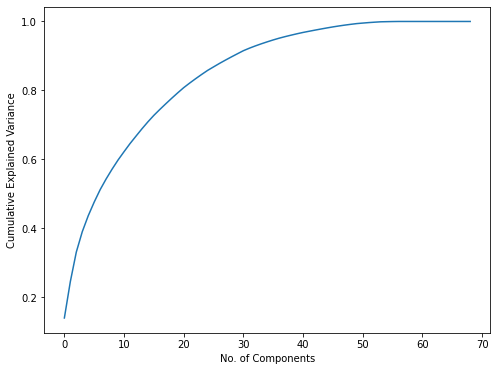

In [114]:
# Using PCA to get information regarding the needed columns
pca = PCA(svd_solver = 'randomized', random_state = 100)
pca.fit(X_train)   
# Making the screeplot - plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [115]:
# Getting the cumulativer sum of the no. of compoments.
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([14.03, 24.57, 33.13, 39.04, 43.67, 47.64, 51.25, 54.35, 57.2 ,
       59.85, 62.25, 64.59, 66.75, 68.88, 70.9 , 72.79, 74.5 , 76.15,
       77.76, 79.32, 80.82, 82.15, 83.42, 84.64, 85.81, 86.83, 87.84,
       88.8 , 89.73, 90.63, 91.52, 92.25, 92.91, 93.52, 94.1 , 94.65,
       95.16, 95.61, 96.03, 96.44, 96.82, 97.16, 97.49, 97.81, 98.12,
       98.42, 98.69, 98.94, 99.17, 99.38, 99.53, 99.67, 99.79, 99.9 ,
       99.94, 99.97, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99])

**INSIGHTS**

Looks like that 40 columns is able to successfully ecplain about 96% of the variance in the dataset. So, the number of components we choose for the Incremental PCA will be **_40_**

(20876, 40)
(20876, 1)
(8948, 40)
(8948, 1)


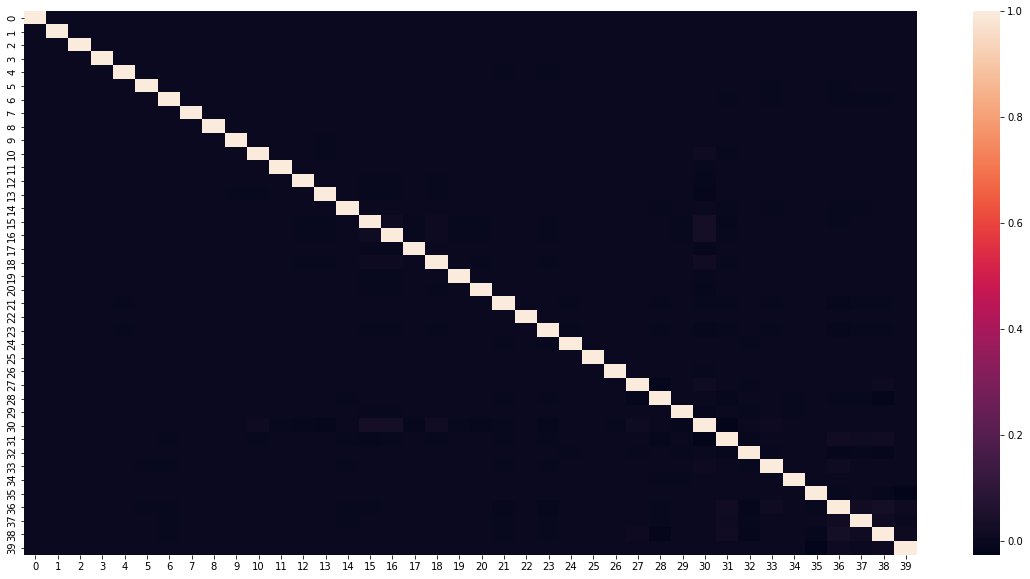

max corr: 0.031321658468137746 , min corr:  -0.025834312041324508


In [116]:
# Creating a X_train and X_test with the Incremental PCA and keeping the number of components as 40
pca_final = IncrementalPCA(n_components=40)
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)

X_train_pca = pd.DataFrame(data = X_train_pca)
X_test_pca = pd.DataFrame(data = X_test_pca)

print(X_train_pca.shape)
print(y_train.shape)
print(X_test_pca.shape)
print(y_test.shape)
    
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())

#plotting the correlation matrix
plt.figure(figsize = (20,10))
sns.heatmap(corrmat)
plt.show()
    
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min())

There is no correlation between any components. As it is visible from the heatmap. 

In [117]:
# using the SMOTE for imbalanced data
sampling = SMOTEENN(random_state = 100)
X_train_resampled, y_train_resampled = sampling.fit_resample(X_train_pca.values, y_train.values.ravel())

# Shuffle the data
permutations = np.random.permutation(X_train_resampled.shape[0])
X_train_resampled = X_train_resampled[permutations]
y_train_resampled = y_train_resampled[permutations]

X_train_resampled = pd.DataFrame(data = X_train_resampled)
y_train_resampled = pd.DataFrame(data = y_train_resampled)

In [118]:
# Creating the dataframe to keep records of all the different models so that it will be easier later to compare
record = pd.DataFrame(columns = ['Model Name', 'Accuracy', 'Recall', 'Precision', 'AUC', 'ROC_AUC Score ', 'F1 Score'])
record

,Model Name,Accuracy,Recall,Precision,AUC,ROC_AUC Score,F1 Score


#### 1.  LOGISTIC REGRESSION

In [119]:
# Creating a logistic regression model, fitting it and making predictions
lr = LogisticRegression(n_jobs = -1, random_state = 100)
logiregmodel = lr.fit(X_train_resampled.values, y_train_resampled.values.ravel())
pred_test = logiregmodel.predict(X_test_pca)

In [120]:
# Let's take a look at the confusion matrix
confusion = confusion_matrix(y_test.values.ravel(), pred_test)
confusion

array([[6104, 2160],
       [  81,  603]])

In [121]:
# Finding the evaluation metrics
accuracy = round(accuracy_score(y_test.values.ravel(), pred_test),2)
recall = round(recall_score(y_test.values.ravel(), pred_test),2)
precision = round(precision_score(y_test.values.ravel(), pred_test),2)
auc = round(roc_auc_score(y_test.values.ravel(), pred_test),2)
f1 = round(f1_score(y_test.values.ravel(), pred_test),2)
rocauc = round(roc_auc_score(y_test, pred_test), 2)

In [122]:
# Function to draw a ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

    return None

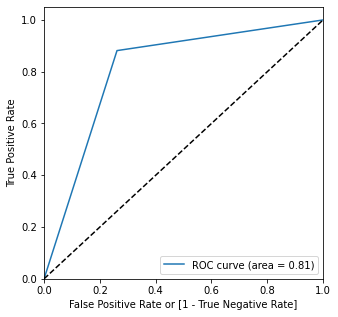

In [123]:
# Creating a ROC Curve
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), pred_test)
draw_roc(y_test.values.ravel(), pred_test)

In [124]:
# Storing the record in the dataset of records
new_row = pd.Series(data={'Model Name': "Logistic Regression", 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'AUC': auc, 'ROC_AUC Score ': rocauc, 'F1 Score': f1}, name=1)
record = record.append(new_row, ignore_index=False)
record

,Model Name,Accuracy,Recall,Precision,AUC,ROC_AUC Score,F1 Score
1,Logistic Regression,0.75,0.88,0.22,0.81,0.81,0.35


#### 2. SVM Regression Modelling

  ##### a. Linear

In [125]:
# # Building SVM Model with linear kernel and making predictions on the test dataset
# modelSVMLinear = SVC(kernel="linear")
# modelSVMLinear.fit(X_train_resampled.values, y_train_resampled.values.ravel())
# pred_test = modelSVMLinear.predict(X_test_pca)

In [126]:
# # Creating the confusion matrix
# confusion = confusion_matrix(y_test.values.ravel(), pred_test)
# confusion

In [127]:
# # Calculating the evaluation metrics
# accuracy = round(accuracy_score(y_test.values.ravel(), pred_test),2)
# recall = round(recall_score(y_test.values.ravel(), pred_test),2)
# precision = round(precision_score(y_test.values.ravel(), pred_test),2)
# auc = round(roc_auc_score(y_test.values.ravel(), pred_test),2)
# f1 = round(f1_score(y_test.values.ravel(), pred_test),2)
# rocauc = round(roc_auc_score(y_test, pred_test), 2)

In [128]:
# # Creating a ROC Curve
# fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), pred_test)
# draw_roc(y_test.values.ravel(), pred_test)

In [129]:
# # Storing the record in the dataset of records
# new_row = pd.Series(data={'Model Name': "SVM(Linear Kernel)", 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'AUC': auc, 'ROC_AUC Score ': rocauc, 'F1 Score': f1}, name=2)
# record = record.append(new_row, ignore_index=False)
# record

##### b. RBF

In [130]:
# # Building SVM Model with linear kernel and making predictions on the test dataset
# modelSVMRbf = SVC(kernel="rbf")
# modelSVMRbf.fit(X_train_resampled.values, y_train_resampled.values.ravel())
# pred_test = modelSVMRbf.predict(X_test_pca)

In [131]:
# # Calculating the confusion matrix
# confusion = confusion_matrix(y_test.values.ravel(), pred_test)
# confusion

In [132]:
# # Calculating the evaluation metrics
# accuracy = round(accuracy_score(y_test.values.ravel(), pred_test),2)
# recall = round(recall_score(y_test.values.ravel(), pred_test),2)
# precision = round(precision_score(y_test.values.ravel(), pred_test),2)
# auc = round(roc_auc_score(y_test.values.ravel(), pred_test),2)
# f1 = round(f1_score(y_test.values.ravel(), pred_test),2)
# rocauc = round(roc_auc_score(y_test, pred_test), 2)

In [133]:
# # Creating a ROC Curve
# fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), pred_test)
# draw_roc(y_test.values.ravel(), pred_test)

In [134]:
# # Checking the accuracy. 
# accuracy

**INSIGHTS**

The non-linear model gives approximately 82% accuracy. Thus, going forward, let's choose hyperparameters corresponding to non-linear models.

In [135]:
# # Creating the KFold
# folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

In [136]:
# # Using GridSearchCV for making KFolds and then using it to fit the model to get the comparison for different hyperparameter
# params = [ {'gamma': [1e-1,1e-2, 1e-3, 1e-4], 'C': [1, 10, 100, 1000]}]
# modelSVMRbf = SVC(kernel="rbf")

# model_cv_svmrbf = GridSearchCV(estimator = modelSVMRbf, 
#                         param_grid = params, 
#                         scoring= 'accuracy', 
#                         cv = folds, 
#                         n_jobs = -1,
#                         verbose = 1,
#                         return_train_score=True)  

In [137]:
# # Fitting the model with different hyper parameters
# model_cv_svmrbf.fit(X_train_resampled.values, y_train_resampled.values.ravel())

In [138]:
# # Fuunction to get graph for different set of hyperparameters
# def display_hyper_stats(cv_results,param_value):
#     gamma = cv_results[cv_results['param_gamma']==param_value]
#     plt.plot(gamma["param_C"], gamma["mean_test_score"])
#     plt.plot(gamma["param_C"], gamma["mean_train_score"])
#     plt.xlabel('C')
#     plt.ylabel('Accuracy')
#     plt.title("Gamma="+str(param_value))
#     plt.ylim([0.60, 1])
#     plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
#     plt.xscale('log')

In [139]:
# svmrbf_cv_results = pd.DataFrame(model_cv_svmrbf.cv_results_)
# svmrbf_cv_results['param_C'] = svmrbf_cv_results['param_C'].astype('int')
# gamma=[1e-1,1e-2, 1e-3, 1e-4]
# plt.figure(figsize=(16,5))
# plt.subplot(141)
# display_hyper_stats(svmrbf_cv_results,gamma[0])
# plt.subplot(142)
# display_hyper_stats(svmrbf_cv_results,gamma[1])
# plt.subplot(143)
# display_hyper_stats(svmrbf_cv_results,gamma[2])
# plt.subplot(144)
# display_hyper_stats(svmrbf_cv_results,gamma[3])
# plt.show()

**INSIGHTS**

- Nonlinear models (high gamma) outperform linear models significantly.A high value of C leads to higher performance at any gamma value.
- The model with gamma = 0.1 has a tendency to overfit, but the rest of the choices appear to be reasonable.
- This indicates that the issue and data are intrinsically non-linear, and therefore in this circumstance, a complicated model will outperform simple, linear models.

In [140]:
# # Getting the best score and best hyperparameters
# best_score = model_cv_svmrbf.best_score_
# best_hyperparams = model_cv_svmrbf.best_params_

In [141]:
# # Printing the best hyperparameter and the best score
# best_score, best_hyperparams

**INSIGHTS**
- Looking at above curves and values , model with gamma=0.1 seems to be overfitting and should not be used.
- Model selected with best value as 'C': 100, 'gamma': 0.1 but this model also seems to be overfitting
- But model selected with value 'C': 10, 'gamma': 0.1 should produce better results. We will be selecting these values for final modelling.

In [142]:
# # Creating the final model with the best hyperparameter values we received and analysed. 
# final_svm_model = SVC(C=10, gamma=0.1, kernel="rbf")

# final_svm_model.fit(X_train_resampled.values, y_train_resampled.values.ravel())
# pred_test = final_svm_model.predict(X_test_pca)

In [143]:
# # Calculating the confusion matrix
# confusion = confusion_matrix(y_test.values.ravel(), pred_test)
# confusion

In [144]:
# # Calculating the evaluation metrics
# accuracy = round(accuracy_score(y_test.values.ravel(), pred_test),2)
# recall = round(recall_score(y_test.values.ravel(), pred_test),2)
# precision = round(precision_score(y_test.values.ravel(), pred_test),2)
# auc = round(roc_auc_score(y_test.values.ravel(), pred_test),2)
# f1 = round(f1_score(y_test.values.ravel(), pred_test),2)
# rocauc = round(roc_auc_score(y_test, pred_test), 2)

In [145]:
# # Creating a ROC Curve
# fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), pred_test)
# draw_roc(y_test.values.ravel(), pred_test)

In [146]:
# # Storing the record in the dataset of records
# new_row = pd.Series(data={'Model Name': "SVM(Non Linear Kernel)", 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'AUC': auc, 'ROC_AUC Score ': rocauc, 'F1 Score': f1}, name=3)
# record = record.append(new_row, ignore_index=False)
# record

#### 3. Decision Tree Classifier

In [147]:
# Building Decision Tree Mode and making predictions on the test dataset
dt = DecisionTreeClassifier(random_state=100)
dt.fit(X_train_resampled.values, y_train_resampled.values.ravel())
pred_test = dt.predict(X_test_pca)

In [148]:
# Calculating the confusion matrix
confusion = confusion_matrix(y_test.values.ravel(), pred_test)
confusion

array([[6831, 1433],
       [ 182,  502]])

In [149]:
# Calculating the evaluation metrics
accuracy = round(accuracy_score(y_test.values.ravel(), pred_test),2)
recall = round(recall_score(y_test.values.ravel(), pred_test),2)
precision = round(precision_score(y_test.values.ravel(), pred_test),2)
auc = round(roc_auc_score(y_test.values.ravel(), pred_test),2)
f1 = round(f1_score(y_test.values.ravel(), pred_test),2)
rocauc = round(roc_auc_score(y_test, pred_test), 2)

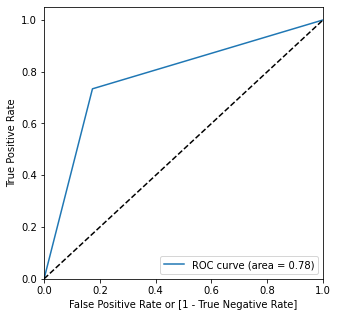

In [150]:
# Creating a ROC Curve
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), pred_test)
draw_roc(y_test.values.ravel(), pred_test)

In [151]:
# Storing the record in the dataset of records
new_row = pd.Series(data={'Model Name': "Decision Tree(Not tuned)", 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'AUC': auc, 'ROC_AUC Score ': rocauc, 'F1 Score': f1}, name=4)
record = record.append(new_row, ignore_index=False)
record

,Model Name,Accuracy,Recall,Precision,AUC,ROC_AUC Score,F1 Score
1,Logistic Regression,0.75,0.88,0.22,0.81,0.81,0.35
4,Decision Tree(Not tuned),0.82,0.73,0.26,0.78,0.78,0.38


Now we tune the hyperparameter to see if we get better results. 

In [152]:
# Creating the KFold
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

In [153]:
# Using GridSearchCV for making KFolds and then using it to fit the model to get the comparison for different hyperparameter
params = [{
    'max_depth': [2, 3, 5, 10, 20, 50],
    'min_samples_leaf': [5, 10, 20, 50, 100,200, 500, 1000, 2000, 5000],
    'criterion': ["gini", "entropy"],
    'max_features': [10, 20, 30, 50, 75, 100], 
    'max_leaf_nodes': [10, 20, 30, 40, 50, 75, 100, 200]
}]

dttuned = DecisionTreeClassifier(random_state=100) 

dttuned_model = GridSearchCV(estimator = dttuned, 
                        param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)

In [154]:
# Fitting the model with different hyper parameters
dttuned_model.fit(X_train_resampled.values, y_train_resampled.values.ravel())

Fitting 5 folds for each of 5760 candidates, totalling 28800 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=100), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 3, 5, 10, 20, 50],
                          'max_features': [10, 20, 30, 50, 75, 100],
                          'max_leaf_nodes': [10, 20, 30, 40, 50, 75, 100, 200],
                          'min_samples_leaf': [5, 10, 20, 50, 100, 200, 500,
                                               1000, 2000, 5000]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [155]:
# Getting the best score and best hyperparameters
best_score = dttuned_model.best_score_
best_hyperparams = dttuned_model.best_params_

In [156]:
# Printing the best hyperparameter and the best score
best_score, best_hyperparams

(0.9024514683341531,
 {'criterion': 'gini',
  'max_depth': 20,
  'max_features': 30,
  'max_leaf_nodes': 200,
  'min_samples_leaf': 5})

**INSIGHTS**

The best hyperparameters are the ones which we will now be using to create the Decision Tree Model and then evaluating the performance. 

In [157]:
# Building Decision Tree and making predictions on the test dataset with tuned hyperparameter
dth = DecisionTreeClassifier(random_state=100, criterion='gini', max_depth=20, min_samples_leaf=5, max_features=30, max_leaf_nodes=200)
dth.fit(X_train_resampled.values, y_train_resampled.values.ravel())
pred_test = dth.predict(X_test_pca)

In [158]:
# Calculating the confusion matrix
confusion = confusion_matrix(y_test.values.ravel(), pred_test)
confusion

array([[6501, 1763],
       [ 128,  556]])

In [159]:
# Calculating the evaluation metrics
accuracy = round(accuracy_score(y_test.values.ravel(), pred_test),2)
recall = round(recall_score(y_test.values.ravel(), pred_test),2)
precision = round(precision_score(y_test.values.ravel(), pred_test),2)
auc = round(roc_auc_score(y_test.values.ravel(), pred_test),2)
f1 = round(f1_score(y_test.values.ravel(), pred_test),2)
rocauc = round(roc_auc_score(y_test, pred_test), 2)

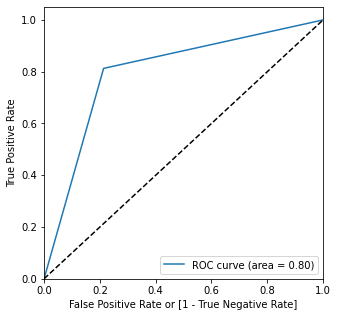

In [160]:
# Creating a ROC Curve
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), pred_test)
draw_roc(y_test.values.ravel(), pred_test)

In [161]:
# Storing the record in the dataset of records
new_row = pd.Series(data={'Model Name': "Decision Tree(Hyperparameter tuned)", 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'AUC': auc, 'ROC_AUC Score ': rocauc, 'F1 Score': f1}, name=5)
record = record.append(new_row, ignore_index=False)
record

,Model Name,Accuracy,Recall,Precision,AUC,ROC_AUC Score,F1 Score
1,Logistic Regression,0.75,0.88,0.22,0.81,0.81,0.35
4,Decision Tree(Not tuned),0.82,0.73,0.26,0.78,0.78,0.38
5,Decision Tree(Hyperparameter tuned),0.79,0.81,0.24,0.80,0.80,0.37


#### 4. RANDOM FOREST CLASSIFIER

In [162]:
# Building Random Forest Classifier and making predictions on the test dataset
rfc = RandomForestClassifier(random_state=100)
rfc.fit(X_train_resampled.values, y_train_resampled.values.ravel())
pred_test = rfc.predict(X_test_pca)

In [163]:
# Calculating the confusion matrix
confusion = confusion_matrix(y_test.values.ravel(), pred_test)
confusion

array([[7356,  908],
       [ 173,  511]])

In [164]:
# Calculating the evaluation metrics
accuracy = round(accuracy_score(y_test.values.ravel(), pred_test),2)
recall = round(recall_score(y_test.values.ravel(), pred_test),2)
precision = round(precision_score(y_test.values.ravel(), pred_test),2)
auc = round(roc_auc_score(y_test.values.ravel(), pred_test),2)
f1 = round(f1_score(y_test.values.ravel(), pred_test),2)
rocauc = round(roc_auc_score(y_test, pred_test), 2)

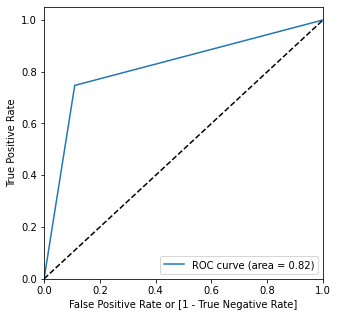

In [165]:
# Creating a ROC Curve
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), pred_test)
draw_roc(y_test.values.ravel(), pred_test)

In [166]:
# Storing the record in the dataset of records
new_row = pd.Series(data={'Model Name': "Random Forest Classifier(Not tuned)", 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'AUC': auc, 'ROC_AUC Score ': rocauc, 'F1 Score': f1}, name=6)
record = record.append(new_row, ignore_index=False)
record

,Model Name,Accuracy,Recall,Precision,AUC,ROC_AUC Score,F1 Score
1,Logistic Regression,0.75,0.88,0.22,0.81,0.81,0.35
4,Decision Tree(Not tuned),0.82,0.73,0.26,0.78,0.78,0.38
5,Decision Tree(Hyperparameter tuned),0.79,0.81,0.24,0.80,0.80,0.37
6,Random Forest Classifier(Not tuned),0.88,0.75,0.36,0.82,0.82,0.49


Now we tune the hyperparameter to see if we get better results.

In [167]:
# Create the parameter grid based on the results of random search 
params = [{
    'max_depth': [5, 10, 20, 50],
    'max_features': [10,50,100,200,500],
    'min_samples_leaf': [5,10,20],
    'n_estimators': [10, 25, 50, 100]
}]

rf = RandomForestClassifier()
rf_grid_search = GridSearchCV(estimator = rf, param_grid = params, cv = 5, n_jobs = -1,verbose = 1,return_train_score=True)

In [168]:
rf_grid_search.fit(X_train_resampled.values, y_train_resampled.values.ravel())

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'max_depth': [5, 10, 20, 50],
                          'max_features': [10, 50, 100, 200, 500],
                          'min_samples_leaf': [5, 10, 20],
                          'n_estimators': [10, 25, 50, 100]}],
             return_train_score=True, verbose=1)

In [169]:
# Getting the best score and best hyperparameters
best_score = rf_grid_search.best_score_
best_hyperparams = rf_grid_search.best_params_

In [170]:
# Printing the best hyperparameter and the best score
best_score, best_hyperparams

(0.9664945709966741,
 {'max_depth': 50,
  'max_features': 10,
  'min_samples_leaf': 5,
  'n_estimators': 100})

**INSIGHTS**

The best hyperparameters are the ones which we will now be using to create the Random Forest Classifier Model and then evaluating the performance.

In [171]:
# Building Random Forest Classifier and making predictions on the test dataset with tuned hyperparameter
rfc = RandomForestClassifier(random_state=100, max_depth=20,max_features=10, min_samples_leaf=5, n_estimators=100)
rfc.fit(X_train_resampled.values, y_train_resampled.values.ravel())
pred_test = rfc.predict(X_test_pca)

In [172]:
# Calculating the confusion matrix
confusion = confusion_matrix(y_test.values.ravel(), pred_test)
confusion

array([[7235, 1029],
       [ 146,  538]])

In [173]:
# Calculating the evaluation metrics
accuracy = round(accuracy_score(y_test.values.ravel(), pred_test),2)
recall = round(recall_score(y_test.values.ravel(), pred_test),2)
precision = round(precision_score(y_test.values.ravel(), pred_test),2)
auc = round(roc_auc_score(y_test.values.ravel(), pred_test),2)
f1 = round(f1_score(y_test.values.ravel(), pred_test),2)
rocauc = round(roc_auc_score(y_test, pred_test), 2)

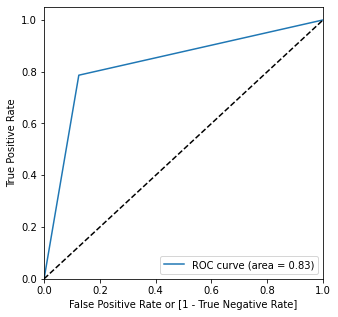

In [174]:
# Creating a ROC Curve
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), pred_test)
draw_roc(y_test.values.ravel(), pred_test)

In [175]:
# Storing the record in the dataset of records
new_row = pd.Series(data={'Model Name': "Random Forest Classifier(Hyperparameter tuned)", 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'AUC': auc, 'ROC_AUC Score ': rocauc, 'F1 Score': f1}, name=7)
record = record.append(new_row, ignore_index=False)
record

,Model Name,Accuracy,Recall,Precision,AUC,ROC_AUC Score,F1 Score
1,Logistic Regression,0.75,0.88,0.22,0.81,0.81,0.35
4,Decision Tree(Not tuned),0.82,0.73,0.26,0.78,0.78,0.38
5,Decision Tree(Hyperparameter tuned),0.79,0.81,0.24,0.80,0.80,0.37
6,Random Forest Classifier(Not tuned),0.88,0.75,0.36,0.82,0.82,0.49
7,Random Forest Classifier(Hyperparameter tuned),0.87,0.79,0.34,0.83,0.83,0.48


### XGBoost

In [176]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [178]:
# Building XGBoost and making predictions on the test dataset
modelxgb = XGBClassifier(random_state=100)
modelxgb.fit(X_train_resampled.values, y_train_resampled.values.ravel())
pred_test = modelxgb.predict(X_test_pca.values)

In [179]:
# Calculating the confusion matrix
confusion = confusion_matrix(y_test.values.ravel(), pred_test)
confusion

array([[6585, 1679],
       [ 103,  581]])

In [180]:
# Evaluation metrics
accuracy = round(accuracy_score(y_test.values.ravel(), pred_test),2)
recall = round(recall_score(y_test.values.ravel(), pred_test),2)
precision = round(precision_score(y_test.values.ravel(), pred_test),2)
auc = round(roc_auc_score(y_test.values.ravel(), pred_test),2)
f1 = round(f1_score(y_test.values.ravel(), pred_test),2)

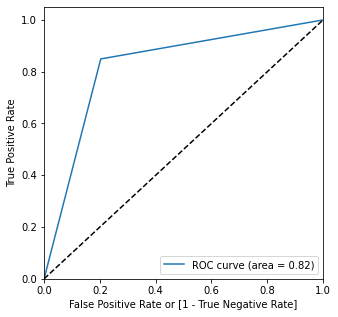

In [181]:
# Creating a ROC Curve
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), pred_test)
draw_roc(y_test.values.ravel(), pred_test)

In [182]:
# Storing the record in the dataset of records
new_row = pd.Series(data={'Model Name': "XGBoost(Not tuned)", 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'AUC': auc, 'ROC_AUC Score ': rocauc, 'F1 Score': f1}, name=8)
record = record.append(new_row, ignore_index=False)
record

,Model Name,Accuracy,Recall,Precision,AUC,ROC_AUC Score,F1 Score
1,Logistic Regression,0.75,0.88,0.22,0.81,0.81,0.35
4,Decision Tree(Not tuned),0.82,0.73,0.26,0.78,0.78,0.38
5,Decision Tree(Hyperparameter tuned),0.79,0.81,0.24,0.80,0.80,0.37
6,Random Forest Classifier(Not tuned),0.88,0.75,0.36,0.82,0.82,0.49
7,Random Forest Classifier(Hyperparameter tuned),0.87,0.79,0.34,0.83,0.83,0.48
8,XGBoost(Not tuned),0.80,0.85,0.26,0.82,0.83,0.39


Now we tune the hyperparameter to see if we get better results.

In [183]:
folds = 5
# specify range of hyperparameters
params = {'learning_rate': [0.1,0.3,0.5,0.7], 
        'subsample': [0.3,0.5,0.7],
         'max_depth': [5, 10, 25, 50], 
         'n_estimators': [10, 25, 50, 100]}          

# specify model
xgb_model = XGBClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = params, 
                        scoring= 'accuracy', # accuracy
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)

In [184]:
# Fitting to get the KFolds
model_cv.fit(X_train_resampled.values, y_train_resampled.values.ravel()) 

Fitting 5 folds for each of 192 candidates, totalling 960 fits


KeyboardInterrupt: ignored

In [ ]:
# Getting the best score and best hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

In [ ]:
# Printing the best hyperparameter and the best score
best_score, best_hyperparams

**INSIGHTS**

The best hyperparameters are the ones which we will now be using to create the XGBoost Model and then evaluating the performance.

In [ ]:
# Building XGBoost and making predictions on the test dataset with tuned hyperparameter
modelxgbt = XGBClassifier(learning_rate=0.3, max_depth=50, n_estimators=100,subsample=0.7, random_state=100)
modelxgbt.fit(X_train_resampled.values, y_train_resampled.values.ravel())
pred_test = modelxgbt.predict(X_test_pca)

In [ ]:
# Calculating the confusion matrix
confusion = confusion_matrix(y_test.values.ravel(), pred_test)
confusion

In [ ]:
# Calculating the evaluation metrics
accuracy = round(accuracy_score(y_test.values.ravel(), pred_test),2)
recall = round(recall_score(y_test.values.ravel(), pred_test),2)
precision = round(precision_score(y_test.values.ravel(), pred_test),2)
auc = round(roc_auc_score(y_test.values.ravel(), pred_test),2)
f1 = round(f1_score(y_test.values.ravel(), pred_test),2)
rocauc = round(roc_auc_score(y_test, pred_test), 2)

In [ ]:
# Creating a ROC Curve
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), pred_test)
draw_roc(y_test.values.ravel(), pred_test)

In [ ]:
# Storing the record in the dataset of records
new_row = pd.Series(data={'Model Name': "XGBoost(Hyperparameter tuned)", 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'AUC': auc, 'ROC_AUC Score ': rocauc, 'F1 Score': f1}, name=9)
record = record.append(new_row, ignore_index=False)
record

Here it is evident from the table that Random Forest Classifier Hyperparameter Tuned and XG Boost Hyperparameter tuned, seems to be the best algorithm for the dataset with ROC-AUC Score being 0.83. This seems to be decent model. 

Moving forward, we will choose Random Forest Classifier with tuned hyperparameter as our algorithm.

In [ ]:
# Feature Importance
plt.bar(range(len(rfc.feature_importances_)), rfc.feature_importances_)
plt.show()

In [ ]:
# plotting the bar graph after binning is done
plt.figure(figsize=(14,8))
sns.countplot(x = 'tenure_range', hue = 'churn',data = tenure,palette=("plasma"))
plt.show()

In [ ]:
# Important Features
col = list(X_train.columns)
df_pca = pd.DataFrame({'PC1':pca_final.components_[0],'PC2':pca_final.components_[1], 'PC3':pca_final.components_[2],'Feature':col})
df_pca.head(10)

**BUSINESS INSIGHTS** 

1. Fewer **high value customers** are churning, but no new high value customers have been onboarded in the last **6 months**, which is worrying and the company should focus on that element.

2. Customers who have been with the company for less than four years are more likely to churn, thus the corporation should focus more on them by introducing new schemes.

3. The most important factor in predicting churn appears to be average revenue per user.

4. For the eighth month, incoming and outgoing calls on romaing are good indications of churn behaviour.

5. Local Outgoing calls to landlines, fixed lines, mobile phones, and call centres are a good measure of churn.

In [ ]:
# Model summary
record

**MODEL INSIGHTS**

1. On this dataset, Random Forest Classifier with customised hyperparameters produces the best result with 0.87 accuracy and Area Under Curve with 0.83.

2. With 0.87 default and 0.88 with modified hyperparameters, XGBoost also produces high accuracy.

3. With tweaked hyperparameters, SVM for Non_linear Kernel produces appropriate accuracy of 0.88 and 0.78 as Area Under Curve.

4. According to our findings, XGBoost and Random Forest give the greatest accuracy, and models may be chosen to predict churn data for future datasets or to forecast churn data for current datasets.